In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


model = MobileNetV2(weights="imagenet")

print("Model loaded successfully!")


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model loaded successfully!


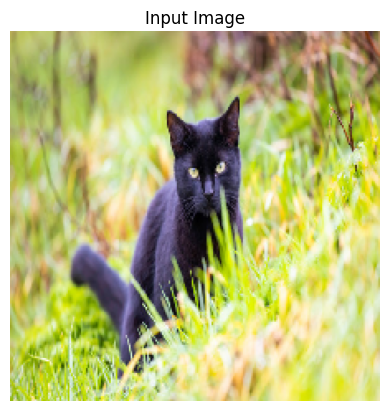

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top Predictions:
kit_fox: 57.79%
grey_fox: 4.49%
groenendael: 3.77%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


img_path = "macee.jpg"


img = image.load_img(img_path, target_size=(224, 224))


plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()


x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


preds = model.predict(x)
decoded = decode_predictions(preds, top=3)[0]

print("Top Predictions:")
for pred in decoded:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")


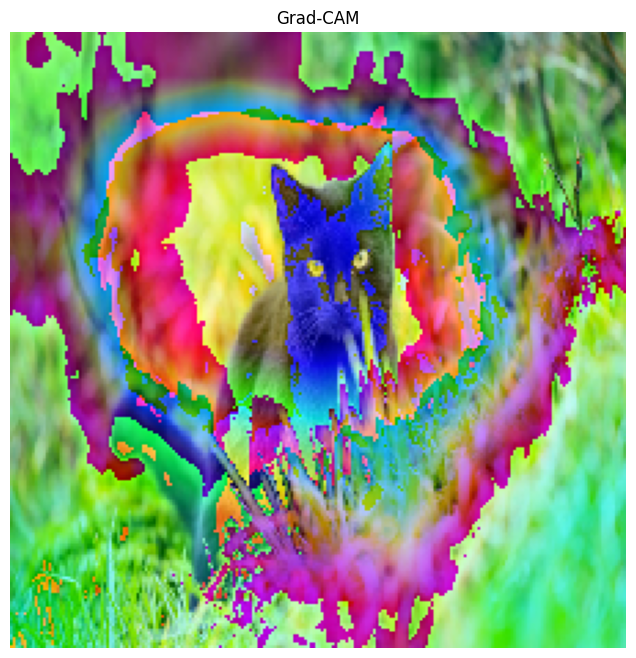

In [20]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


last_conv_layer = model.get_layer("Conv_1")


grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]


grads = tape.gradient(loss, conv_outputs)


pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)


heatmap = np.maximum(heatmap, 0) / np.max(heatmap)



heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)


heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


superimposed_img = heatmap * 0.8 + np.array(img)


plt.figure(figsize=(8, 8))
plt.imshow(superimposed_img.astype(np.uint8))
plt.axis("off")
plt.title("Grad-CAM")
plt.show()


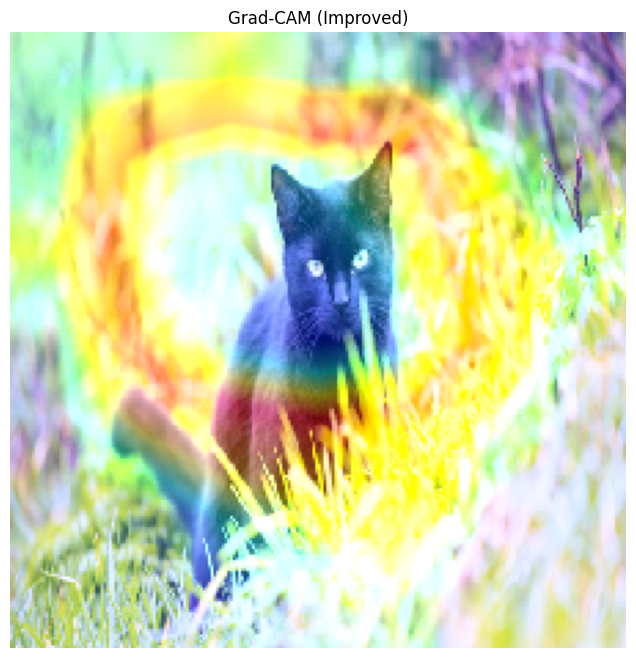

In [12]:

heatmap = heatmap.astype("float32")


heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


heatmap_resized = cv2.resize(heatmap, (224, 224))


original_img = image.img_to_array(img)


heatmap_color = cv2.applyColorMap(
    np.uint8(255 * heatmap_resized),
    cv2.COLORMAP_JET
)
heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

superimposed_img = heatmap_color * 0.4 + original_img
superimposed_img = np.clip(superimposed_img / 255.0, 0, 1)


plt.figure(figsize=(8,8))
plt.imshow(superimposed_img)
plt.axis("off")
plt.title("Grad-CAM (Improved)")
plt.show()


In [15]:


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Input: {img_path}")
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    decoded = decode_predictions(preds, top=3)[0]

    print("Top Predictions:")
    for pred in decoded:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")

    return img, x, preds


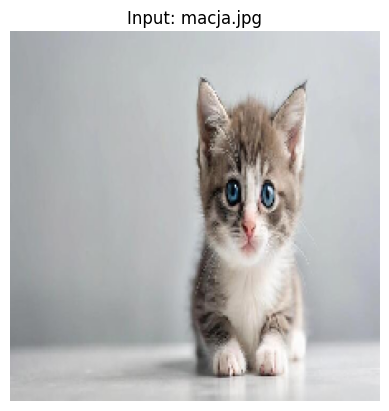

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Top Predictions:
tabby: 51.90%
Egyptian_cat: 20.17%
tiger_cat: 4.70%


In [16]:
img2, x2, preds2 = predict_image("macja.jpg")


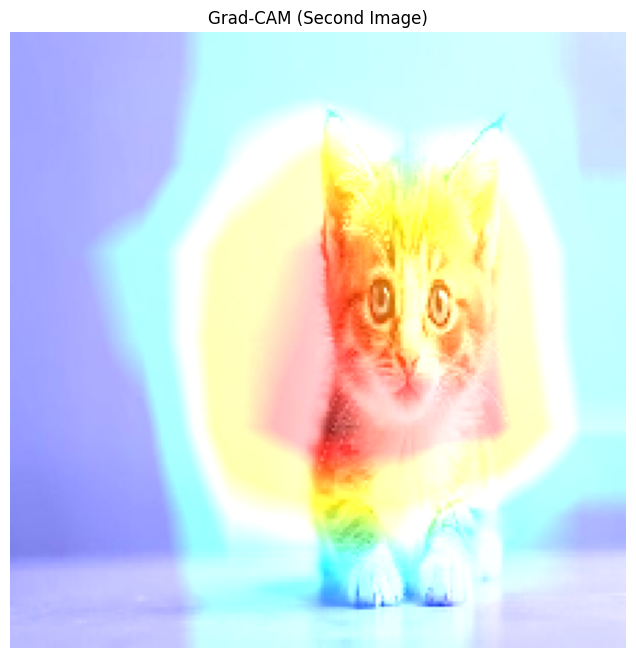

In [21]:


last_conv_layer = model.get_layer("Conv_1")

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x2)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap2 = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap2 = tf.squeeze(heatmap2).numpy()


heatmap2 = heatmap2.astype("float32")


heatmap2 = np.maximum(heatmap2, 0)
heatmap2 /= np.max(heatmap2)

heatmap_resized2 = cv2.resize(heatmap2, (224, 224))


original_img2 = image.img_to_array(img2)

heatmap_color2 = cv2.applyColorMap(
    np.uint8(255 * heatmap_resized2),
    cv2.COLORMAP_JET
)
heatmap_color2 = cv2.cvtColor(heatmap_color2, cv2.COLOR_BGR2RGB)

superimposed_img2 = heatmap_color2 * 0.8 + original_img2
superimposed_img2 = np.clip(superimposed_img2 / 255.0, 0, 1)

plt.figure(figsize=(8,8))
plt.imshow(superimposed_img2)
plt.axis("off")
plt.title("Grad-CAM (Second Image)")
plt.show()


In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_resnet


resnet_model = ResNet50(weights="imagenet")

print("ResNet50 loaded successfully!")


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
ResNet50 loaded successfully!


In [23]:


def predict_resnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"ResNet Input: {img_path}")
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_resnet(x)

    preds = resnet_model.predict(x)
    decoded = decode_resnet(preds, top=3)[0]

    print("ResNet Top Predictions:")
    for pred in decoded:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")

    return img, x, preds


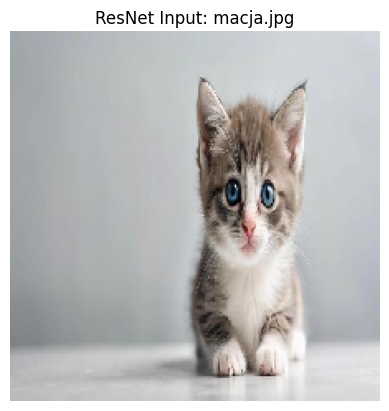

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
ResNet Top Predictions:
Egyptian_cat: 36.58%
lynx: 24.65%
tabby: 24.60%


In [24]:
img_resnet, x_resnet, preds_resnet = predict_resnet("macja.jpg")


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_156']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


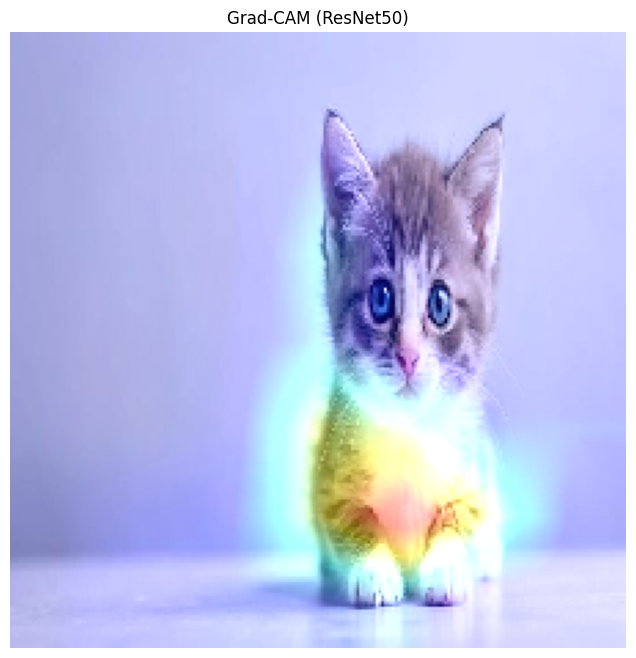

In [25]:


last_conv_layer_resnet = resnet_model.get_layer("conv5_block3_out")

grad_model_resnet = tf.keras.models.Model(
    [resnet_model.inputs],
    [last_conv_layer_resnet.output, resnet_model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model_resnet(x_resnet)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap_resnet = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap_resnet = tf.squeeze(heatmap_resnet).numpy()


heatmap_resnet = heatmap_resnet.astype("float32")


heatmap_resnet = np.maximum(heatmap_resnet, 0)
heatmap_resnet /= np.max(heatmap_resnet)


heatmap_resized_resnet = cv2.resize(heatmap_resnet, (224, 224))


original_img_resnet = image.img_to_array(img_resnet)

heatmap_color_resnet = cv2.applyColorMap(
    np.uint8(255 * heatmap_resized_resnet),
    cv2.COLORMAP_JET
)
heatmap_color_resnet = cv2.cvtColor(heatmap_color_resnet, cv2.COLOR_BGR2RGB)

superimposed_img_resnet = heatmap_color_resnet * 0.4 + original_img_resnet
superimposed_img_resnet = np.clip(superimposed_img_resnet / 255.0, 0, 1)

plt.figure(figsize=(8,8))
plt.imshow(superimposed_img_resnet)
plt.axis("off")
plt.title("Grad-CAM (ResNet50)")
plt.show()


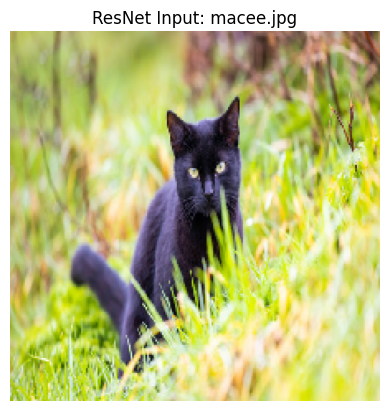

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
ResNet Top Predictions:
groenendael: 95.90%
American_black_bear: 1.29%
kit_fox: 0.40%


In [26]:
img_resnet_1, x_resnet_1, preds_resnet_1 = predict_resnet("macee.jpg")


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_156']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


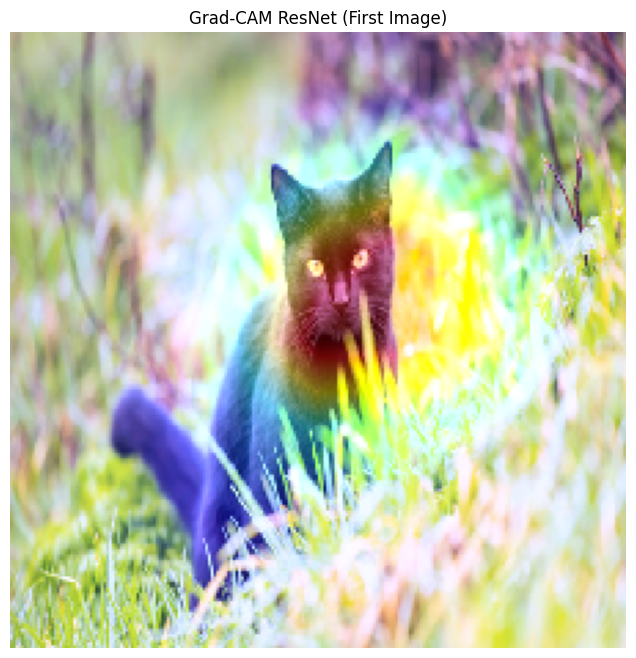

In [27]:


with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model_resnet(x_resnet_1)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap_r1 = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap_r1 = tf.squeeze(heatmap_r1).numpy()

heatmap_r1 = heatmap_r1.astype("float32")
heatmap_r1 = np.maximum(heatmap_r1, 0)
heatmap_r1 /= np.max(heatmap_r1)

heatmap_resized_r1 = cv2.resize(heatmap_r1, (224, 224))

original_img_r1 = image.img_to_array(img_resnet_1)

heatmap_color_r1 = cv2.applyColorMap(
    np.uint8(255 * heatmap_resized_r1),
    cv2.COLORMAP_JET
)
heatmap_color_r1 = cv2.cvtColor(heatmap_color_r1, cv2.COLOR_BGR2RGB)

superimposed_r1 = heatmap_color_r1 * 0.4 + original_img_r1
superimposed_r1 = np.clip(superimposed_r1 / 255.0, 0, 1)

plt.figure(figsize=(8,8))
plt.imshow(superimposed_r1)
plt.axis("off")
plt.title("Grad-CAM ResNet (First Image)")
plt.show()
